## 2020-08-03: Exploring Gaussian Processes

*Last Updated*: 2020-08-03

### Authors
* Kevin Chu (kevin@velexi.com)

### Overview
In this Jupyter notebook, we explore Gaussian processes.

### User parameters

#### Gaussian process parameters
* `domain`: domain for Gaussian process
* `length_scale`: length scale for Gaussian process
* `variance_scale`: variance scale for Gaussian process

#### Sample parameters
* `num_samples`: number of samples to generate

### Revision History

#### 2024-03-21

* Update notebook to use the new `numpy` random number generators.
* Fix bug in formula for covariance matrix.
* Add perturbation to covariance matrix for numerical stability when using Cholesky factorization to generate samples from the Gaussian Process.

#### 2020-08-03

* Initial version of notebook.

In [1]:
# --- Imports

# External packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# --- User parameters

# Gaussian process parameters
domain = {'min': -5.0, 'max': 5.0}
length_scale = 0.5
variance_scale = 1

# Sample parameters
num_samples = 5

In [3]:
# --- Preparations

# Seaborn configuration
sns.set(color_codes=True)

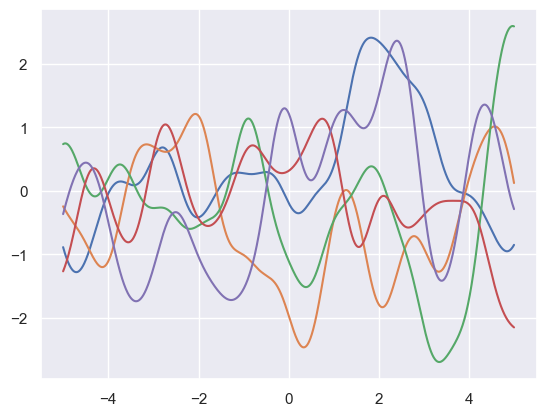

In [4]:
# --- Generate samples from Gaussian process

# ------ Preparations

# Generate grid
dX = 0.01
X = np.arange(domain['min'], domain['max'], dX)
grid_size = len(X)

# Set mean function
m = np.zeros(X.shape)

# ------ Compute covariance matrix

# Compute covariance function
diff_X = np.subtract.outer(X, X)
K = variance_scale * np.exp(-1/2 * np.square(diff_X) / length_scale**2)

# Add small perturbation for numerical stability
lambda_min = min(np.linalg.eigvalsh(K))
if lambda_min < 0:
    epsilon = 1.5 * abs(lambda_min)
    K += epsilon*np.identity(grid_size)

# --- Generate samples from Gaussian process

rng = np.random.default_rng()
f = rng.multivariate_normal(m, K, size=num_samples, method="cholesky")
    
# Plot samples
for i in range(num_samples):
    plt.plot(X, f[i,:])